In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")
from src.util import dt_to_Ls, dt_to_mtfnc

In [2]:
#Some constants
g = 3.81 #m/s^2 surface gravity
M_Mars =  0.64171e+24 #kg
R_Mars = 3396.2e+3 #m
Grav = 6.67408e-11 #m^3 kg^-1 s^-2
amu = 1.660539040e-27 #kg
kboltz = 1.38064852e-23 #J/K

In [3]:
H_pieces = []
for year in [2015, 2016, 2017, 2018, 2019]:
    H_pieces.append(pd.read_csv(f"../output/{year}_H.csv"))
H = pd.concat(H_pieces)

In [4]:
exo_pieces = []
for year in [2015, 2016, 2017, 2018, 2019]:
    exo_pieces.append(pd.read_csv(f"../output/{year}_exo.csv"))
exo = pd.concat(exo_pieces)

In [5]:
peri = pd.read_csv(f"../output/peri.csv", parse_dates=["t_utc"])

In [6]:
data = pd.merge(H, peri, on="orbit")
data = pd.merge(data, exo, on="orbit")

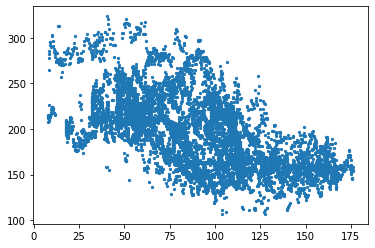

In [7]:
plt.figure()
plt.scatter(data["sza"], (data["H_Ar"]*1000/kboltz*(40*amu*g)), s=5)
plt.show()

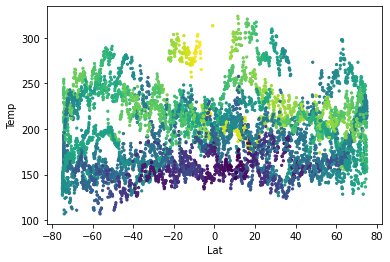

In [8]:
plt.figure()
plt.scatter(
    data["lat"], 
    (data["H_Ar"]*1000/kboltz*(40*amu*g)),
    c=data["sza"],
    cmap="viridis_r",
    s=5
)
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.show()

In [9]:
dusty = data[(data["Ls"]>180) & (data["Ls"]<300)]

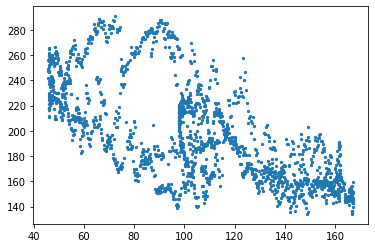

In [10]:
plt.figure()
plt.scatter(dusty["sza"], (dusty["H_Ar"]*1000/kboltz*(40*amu*g)), s=5)
plt.show()

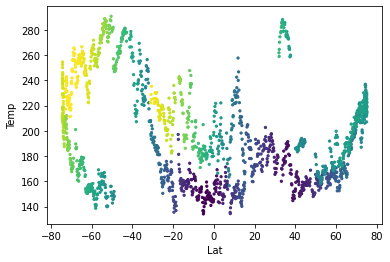

In [11]:
plt.figure()
plt.scatter(
    dusty["lat"], 
    (dusty["H_Ar"]*1000/kboltz*(40*amu*g)),
    c=dusty["sza"],
    cmap="viridis_r",
    s=5
)
plt.xlabel("Lat")
plt.ylabel("Temp")
plt.show()

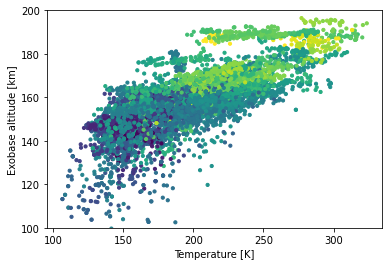

In [12]:
plt.figure()
plt.scatter( 
    (data["H_Ar"]*1000/kboltz*(40*amu*g)),
    data["exo_alt"],
    s=10,
    c=data["sza"],
    cmap="viridis_r"
)
plt.ylim(100,200)
plt.xlabel("Temperature [K]")
plt.ylabel("Exobase altitude [km]")
plt.show()

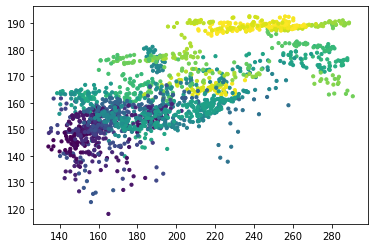

In [13]:
plt.figure()
plt.scatter( 
    (dusty["H_Ar"]*1000/kboltz*(40*amu*g)),
    dusty["exo_alt"],
    s=10,
    c=dusty["sza"],
    cmap="viridis_r"
)
plt.show()

In [14]:
data.columns

Index(['orbit', 'H_Ar', 'fit_slope_Ar', 'fit_intercept_Ar', 'score_Ar', 'H_N2',
       'fit_slope_N2', 'fit_intercept_N2', 'score_N2', 'H_CO2',
       'fit_slope_CO2', 'fit_intercept_CO2', 'score_CO2', 'n_orbits_x',
       'max_alt', 't_utc', 't_unix', 'alt', 'lst', 'long', 'lat', 'sza', 'Ls',
       'exo_alt', 'fit_slope', 'fit_intercept', 'n_orbits_y'],
      dtype='object')

In [15]:
data["t_utc"].apply(dt_to_Ls)

0       289.163574
1       289.280053
2       289.396485
3       289.512849
4       289.629187
           ...    
8123    128.495454
8124    128.567639
8125    128.639860
8126    128.712091
8127    128.856577
Name: t_utc, Length: 8128, dtype: float64

In [26]:
data["MY"] = data["t_utc"].apply(dt_to_mtfnc, args=(mt.Clancy_Year,))

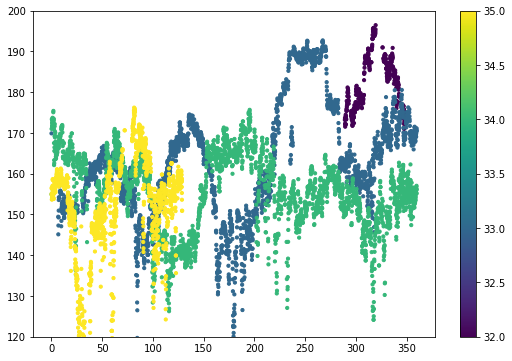

In [37]:
plt.figure(figsize=(9, 6))
plt.scatter(data["Ls"], data["exo_alt"], c=data["MY"], s=10)
plt.colorbar()
plt.ylim(120,200)
plt.show()

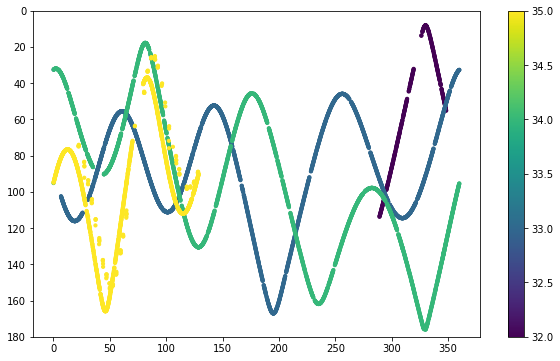

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Ls"], data["sza"], c=data["MY"], s=10)
plt.colorbar()
plt.ylim(180,0)
plt.show()

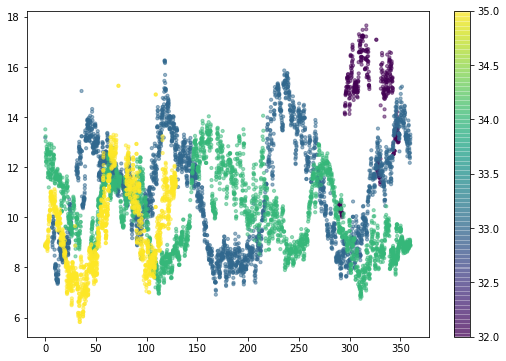

In [36]:
plt.figure(figsize=(9, 6))
plt.scatter(data["Ls"], data["H_Ar"], c=data["MY"], s=10, alpha=0.5)
plt.colorbar()
plt.show()